In [2]:
import numpy as np
import pandas as pd
import csv
dfs = []
for fn in ('sujuyuans3.xlsx','sujuyuans4.xlsx'):
    dfs.append(pd.read_excel(fn,converters={"款号":str}))
df=pd.concat(dfs)
df['款色号']=df['款号'].str.cat(df['色号'].map(str))
df.to_csv('excel_to_python.csv')
#合并提取数据                               

In [3]:

print(df)
df_toushi=df.groupby(['款号','色号'])['零售数量'].agg([len,np.sum, np.mean]).reset_index()#透视
print(df_toushi)
#透视款色销量
df_toushi.to_csv('excel_to_python2.csv')
#写入款色销量

                 款号    色号  大类        门店编码  零售数量    零售金额  零售市值  零售周数  门店数  \
0       11038040159   820  服装  11CP1R0131     7  1122.0  1253     6    1   
1       11038040159   820  服装  11CP1R0191     6   993.0  1074     4    1   
2       11038040159   820  服装  14SAASM002     0     0.0     0     6    1   
3       11038040159   820  服装  15SHASY201    20  3433.0  3580     7    1   
4       11038040159   820  服装  19FZ1S0181     8  1253.0  1432     6    1   
5       11038040159   820  服装  19FZ1S0211    10  1265.0  1790     5    1   
6       11038040159   820  服装  19FZ1S0312     4   613.0   716     3    1   
7       11038040159   820  服装  19FZ1S0361     9  1377.0  1611     8    1   
8       11038040159   820  服装  19FZ1S0401    16  2729.0  2864     6    1   
9       11038040159   820  服装  19FZ1S0421     6   925.0  1074     3    1   
10      11038040159   820  服装  19FZ1SM011     5   856.0   895     4    1   
11      11038040159   820  服装  19FZ1SM012     8  1167.0  1432     7    1   
12      1103

In [4]:
# df=pd.DataFrame(pd.read_csv('excel_to_python2.csv',header=0,encoding="gbk",dtype={"款号":str,"色号":str}))
df_toushi['色号']=df_toushi['色号'].astype('str')
df_paixu=df_toushi.sort_values(by=['len'],ascending=False)
df_paixu['零售累计']=df_paixu['sum'].cumsum()/df_paixu['sum'].sum()
print(df_paixu)
df_paixutiqu=df_paixu.loc[(df_paixu['零售累计'] < 0.8)]#提取了目标款数据
df_paixutiqu['款色号']=df_paixutiqu['款号'].str.cat(df_paixutiqu['色号'])
print(df_paixutiqu)

               款号    色号   len     sum       mean      零售累计
189   11038241339   820  3091  127136  41.131026  0.006288
171   11038241303   820  3072   89388  29.097656  0.010708
402   12038000603  3440  2953   65149  22.061971  0.013930
314   12038000054  1000  2940   44717  15.209864  0.016142
603   12038001181  1000  2938   84114  28.629680  0.020301
659   12038140319   281  2903   50016  17.229073  0.022775
480   12038001105  6650  2849   55468  19.469287  0.025518
684   12038270008  9000  2846   95250  33.468025  0.030229
1315  13038170002  4931  2843   46946  16.512839  0.032550
1189  13038040024   416  2794   41854  14.979957  0.034620
692   12038271205  9000  2790  104838  37.576344  0.039805
576   12038001168  4803  2787   45090  16.178687  0.042035
493   12038001128  1000  2782  153982  55.349389  0.049650
575   12038001168  1000  2780   64265  23.116906  0.052828
479   12038001105  1000  2779   85867  30.898525  0.057075
1180  13038040016   481  2770   23657   8.540433  0.0582

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [5]:
df_hebing=pd.merge(df,df_paixutiqu,how='left',on=['款色号'])#合并两个数据表
print(df_hebing)

                款号_x  色号_x  大类        门店编码  零售数量    零售金额  零售市值  零售周数  门店数  \
0        11038040159   820  服装  11CP1R0131     7  1122.0  1253     6    1   
1        11038040159   820  服装  11CP1R0191     6   993.0  1074     4    1   
2        11038040159   820  服装  14SAASM002     0     0.0     0     6    1   
3        11038040159   820  服装  15SHASY201    20  3433.0  3580     7    1   
4        11038040159   820  服装  19FZ1S0181     8  1253.0  1432     6    1   
5        11038040159   820  服装  19FZ1S0211    10  1265.0  1790     5    1   
6        11038040159   820  服装  19FZ1S0312     4   613.0   716     3    1   
7        11038040159   820  服装  19FZ1S0361     9  1377.0  1611     8    1   
8        11038040159   820  服装  19FZ1S0401    16  2729.0  2864     6    1   
9        11038040159   820  服装  19FZ1S0421     6   925.0  1074     3    1   
10       11038040159   820  服装  19FZ1SM011     5   856.0   895     4    1   
11       11038040159   820  服装  19FZ1SM012     8  1167.0  1432     7    1   

In [6]:
df_hebingtiqu=df_hebing.loc[(df_hebing['零售累计'] >0)]#提取目标款数据
print(df_hebingtiqu)
print(df_hebingtiqu.shape)

                款号_x  色号_x  大类        门店编码  零售数量     零售金额   零售市值  零售周数  门店数  \
1130     11038041342   820  服装  11DX1SM002    12   2022.0   2148    10    1   
1131     11038041342   820  服装  11FS2S0021    13   2036.0   2327    11    1   
1132     11038041342   820  服装  11TZ5S0041     6   1035.0   1074     5    1   
1133     11038041342   820  服装  12BD1S0041     9   1328.0   1611     8    1   
1134     11038041342   820  服装  12HG1S0021    15   2487.0   2685    11    1   
1135     11038041342   820  服装  12TJ1S0011    62  10021.0  11098    19    1   
1136     11038041342   820  服装  12TJBSM003     1    179.0    179     1    1   
1137     11038041342   820  服装  12WQ1S0041    11   1597.0   1969     8    1   
1138     11038041342   820  服装  13CQ8S0031     2    301.0    358     2    1   
1139     11038041342   820  服装  13CQ8S0041     6   1026.0   1074     4    1   
1140     11038041342   820  服装  13CQ8S0061    15   2334.0   2685    12    1   
1141     11038041342   820  服装  13CQ8S0101     5    

In [7]:
df_hebingtiqu['uwszk']=(df_hebingtiqu['零售数量']/df_hebingtiqu['零售周数'])*(df_hebingtiqu['零售金额']/df_hebingtiqu['零售市值'])#计算uws乘以折扣
print(df_hebingtiqu)

                款号_x  色号_x  大类        门店编码  零售数量     零售金额   零售市值  零售周数  门店数  \
1130     11038041342   820  服装  11DX1SM002    12   2022.0   2148    10    1   
1131     11038041342   820  服装  11FS2S0021    13   2036.0   2327    11    1   
1132     11038041342   820  服装  11TZ5S0041     6   1035.0   1074     5    1   
1133     11038041342   820  服装  12BD1S0041     9   1328.0   1611     8    1   
1134     11038041342   820  服装  12HG1S0021    15   2487.0   2685    11    1   
1135     11038041342   820  服装  12TJ1S0011    62  10021.0  11098    19    1   
1136     11038041342   820  服装  12TJBSM003     1    179.0    179     1    1   
1137     11038041342   820  服装  12WQ1S0041    11   1597.0   1969     8    1   
1138     11038041342   820  服装  13CQ8S0031     2    301.0    358     2    1   
1139     11038041342   820  服装  13CQ8S0041     6   1026.0   1074     4    1   
1140     11038041342   820  服装  13CQ8S0061    15   2334.0   2685    12    1   
1141     11038041342   820  服装  13CQ8S0101     5    

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [8]:
df_hebingtiqu.to_csv('excel_to_python3.csv')

In [9]:
df_hebingtiqu['分组排序']=df_hebingtiqu['uwszk'].groupby(df_hebingtiqu['门店编码']).rank(ascending=0,method='dense')#计算分门店排序结果
# df_hebingtiqu.to_csv('excel_to_python4.csv')
df_toushi2=df_hebingtiqu.groupby(['门店编码'])['分组排序'].agg([len]).reset_index()#透视门店累计零售款数
print(df_toushi2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


            门店编码    len
0     11BJBS0071  252.0
1     11BJBS0151  270.0
2     11BJBS0181  255.0
3     11BJBS0241  286.0
4     11BJBS0271  393.0
5     11BJBS0301  369.0
6     11BJBS0321  360.0
7     11BJBS0351  317.0
8     11BJBS0361  329.0
9     11BJBS0381   48.0
10    11BJBS0391  259.0
11    11BJBS0401  217.0
12    11BJBS0411  125.0
13    11BJBS0421   12.0
14    11BJBSM003  254.0
15    11BJBSM005  284.0
16    11BJBSM006  259.0
17    11BJBSM007  373.0
18    11BJBSM008  282.0
19    11BJBSM009   82.0
20    11BJBSM012  373.0
21    11BJBSM013  368.0
22    11BJBSM014  391.0
23    11BJBSM015  312.0
24    11BJBSM016  351.0
25    11BJBSM017  157.0
26    11BJBST001    2.0
27    11CP1R0131  247.0
28    11CP1R0161  110.0
29    11CP1R0191  245.0
...          ...    ...
3688  1ZXS1S0091  305.0
3689  1ZXS1S0161  255.0
3690  1ZXS1S0171  272.0
3691  1ZXS1S0181  352.0
3692  1ZXS1S0221  105.0
3693  1ZXS1S0231  201.0
3694  1ZXS1SM001  222.0
3695  1ZXT1S0011  306.0
3696  1ZYA1S0011  290.0
3697  1ZYJ1S0011

In [10]:
from matplotlib import pyplot

#绘制直方图
def drawHist(heights):
    #创建直方图
    #第一个参数为待绘制的定量数据，不同于定性数据，这里并没有事先进行频数统计
    #第二个参数为划分的区间个数
    
    pyplot.rcParams['figure.figsize'] = (30.0, 10.0)
    pyplot.hist(heights, 100)
    pyplot.xlabel('Heights')
    pyplot.ylabel('Frequency')
    pyplot.title('Heights Of Male Students')
    pyplot.xticks(np.arange(0,600,step=10))
    pyplot.show()

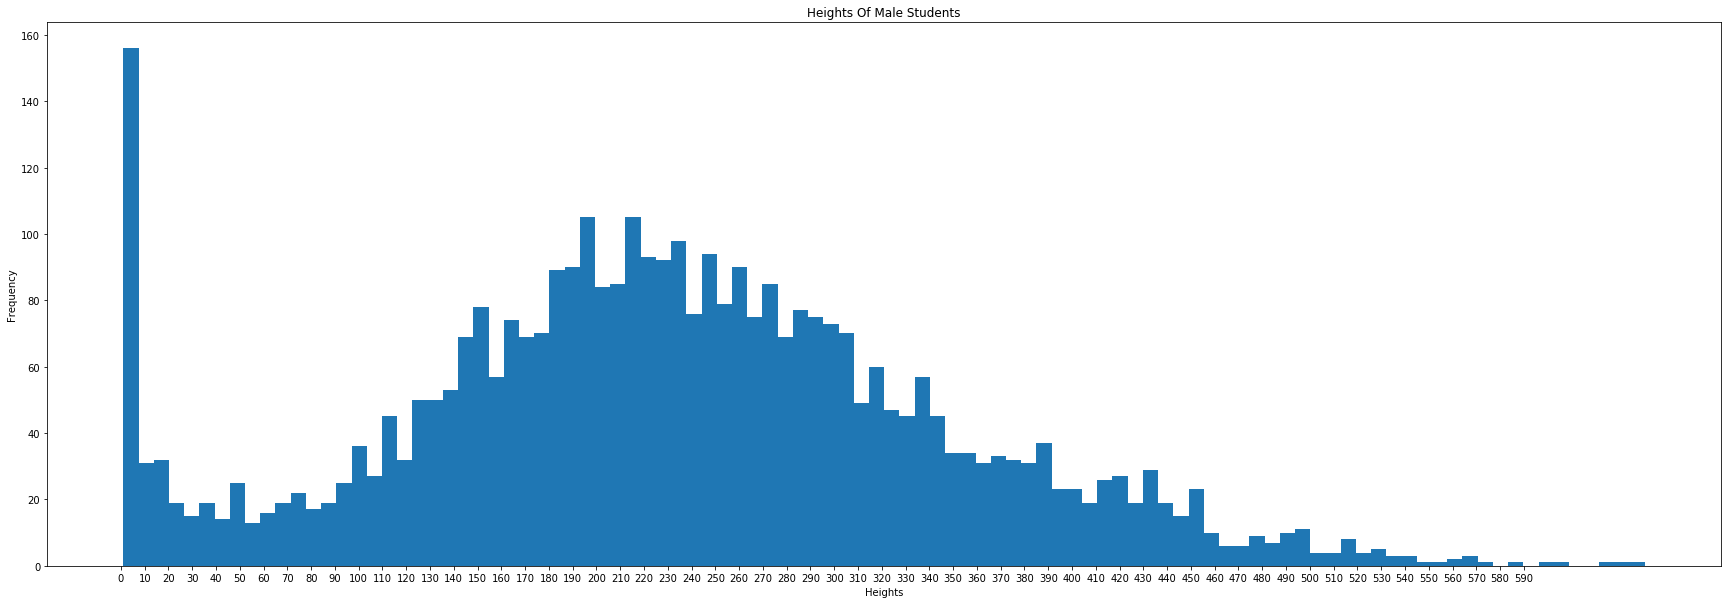

In [11]:
drawHist(df_toushi2['len'])

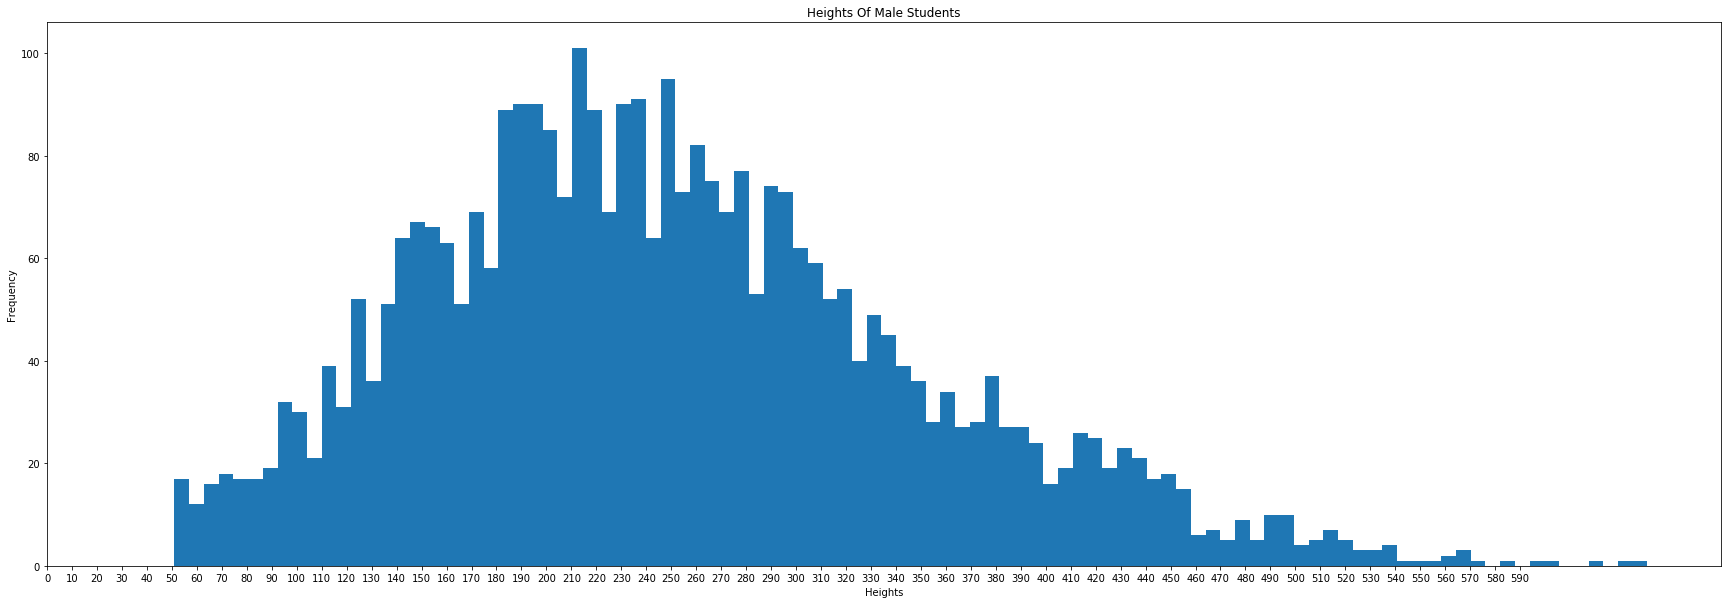

In [12]:
df_toushi3=df_toushi2.loc[(df_toushi2['len'] >50)]#提取目标门店数据
drawHist(df_toushi3['len'])

In [13]:
df_hebing2=pd.merge(df_hebingtiqu,df_toushi3,how='left',on=['门店编码'])#合并两个数据表
df_hebing2=df_hebing2.loc[(df_hebing2['len_y'] >0)]#提取目标款数据
print(df_hebing2)

               款号_x  色号_x  大类        门店编码  零售数量     零售金额   零售市值  零售周数  门店数  \
0       11038041342   820  服装  11DX1SM002    12   2022.0   2148    10    1   
1       11038041342   820  服装  11FS2S0021    13   2036.0   2327    11    1   
2       11038041342   820  服装  11TZ5S0041     6   1035.0   1074     5    1   
3       11038041342   820  服装  12BD1S0041     9   1328.0   1611     8    1   
4       11038041342   820  服装  12HG1S0021    15   2487.0   2685    11    1   
5       11038041342   820  服装  12TJ1S0011    62  10021.0  11098    19    1   
6       11038041342   820  服装  12TJBSM003     1    179.0    179     1    1   
7       11038041342   820  服装  12WQ1S0041    11   1597.0   1969     8    1   
8       11038041342   820  服装  13CQ8S0031     2    301.0    358     2    1   
9       11038041342   820  服装  13CQ8S0041     6   1026.0   1074     4    1   
10      11038041342   820  服装  13CQ8S0061    15   2334.0   2685    12    1   
11      11038041342   820  服装  13CQ8S0101     5    538.0    895 

In [14]:
df_hebing2['排序比例']=(df_hebing2['分组排序']/df_hebing2['len_y'])#算出排序比例值
df_hebing2

,款号_x,色号_x,大类,门店编码,零售数量,零售金额,零售市值,零售周数,门店数,款色号,款号_y,色号_y,len_x,sum,mean,零售累计,uwszk,分组排序,len_y,排序比例
0,11038041342,820,服装,11DX1SM002,12,2022.0,2148,10,1,11038041342820,11038041342,820,638.0,6050.0,9.482759,0.771634,1.129609,294.0,318.0,0.924528
1,11038041342,820,服装,11FS2S0021,13,2036.0,2327,11,1,11038041342820,11038041342,820,638.0,6050.0,9.482759,0.771634,1.034027,198.0,234.0,0.846154
2,11038041342,820,服装,11TZ5S0041,6,1035.0,1074,5,1,11038041342820,11038041342,820,638.0,6050.0,9.482759,0.771634,1.156425,226.0,332.0,0.680723
3,11038041342,820,服装,12BD1S0041,9,1328.0,1611,8,1,11038041342820,11038041342,820,638.0,6050.0,9.482759,0.771634,0.927374,401.0,435.0,0.921839
4,11038041342,820,服装,12HG1S0021,15,2487.0,2685,11,1,11038041342820,11038041342,820,638.0,6050.0,9.482759,0.771634,1.263078,154.0,291.0,0.529210
5,11038041342,820,服装,12TJ1S0011,62,10021.0,11098,19,1,11038041342820,11038041342,820,638.0,6050.0,9.482759,0.771634,2.946486,182.0,213.0,0.854460
6,11038041342,820,服装,12TJBSM003,1,179.0,179,1,1,11038041342820,11038041342,820,638.0,6050.0,9.482759,0.771634,1.000000,17.0,76.0,0.223684
7,11038041342,820,服装,12WQ1S0041,11,1597.0,1969,8,1,11038041342820,11038041342,820,638.0,6050.0,9.482759,0.771634,1.115223,88.0,250.0,0.352000
8,11038041342,820,服装,13CQ8S0031,2,301.0,358,2,1,11038041342820,11038041342,820,638.0,6050.0,9.482759,0.771634,0.840782,331.0,390.0,0.848718
9,11038041342,820,服装,13CQ8S0041,6,1026.0,1074,4,1,11038041342820,11038041342,820,638.0,6050.0,9.482759,0.771634,1.432961,136.0,408.0,0.333333


In [15]:
df_tiqu=df_hebing2[['门店编码','款色号','排序比例']]#提取其中需要的3列数据
print(df_tiqu)

              门店编码             款色号      排序比例
0       11DX1SM002  11038041342820  0.924528
1       11FS2S0021  11038041342820  0.846154
2       11TZ5S0041  11038041342820  0.680723
3       12BD1S0041  11038041342820  0.921839
4       12HG1S0021  11038041342820  0.529210
5       12TJ1S0011  11038041342820  0.854460
6       12TJBSM003  11038041342820  0.223684
7       12WQ1S0041  11038041342820  0.352000
8       13CQ8S0031  11038041342820  0.848718
9       13CQ8S0041  11038041342820  0.333333
10      13CQ8S0061  11038041342820  0.689095
11      13CQ8S0101  11038041342820  0.556250
12      15CJ1S0011  11038041342820  0.272446
13      15PD2S0021  11038041342820  0.617347
14      15SHAL0151  11038041342820  0.879845
15      15SHAL0211  11038041342820  0.776650
16      15SHAL0231  11038041342820  0.937143
17      15SHAL0241  11038041342820  0.787037
18      15SHALM019  11038041342820  0.826816
19      15SHASX021  11038041342820  0.318367
20      15SHASX171  11038041342820  0.710204
21      15

In [16]:
# df_tiqu.set_index(['门店编码','款色号'],drop=False)
# df_tiqu.unstack(level=-1)#转成2维表
# # df_tiqu.to_csv('excel_to_python5.csv')
# # 将一维数据表转化为二维数据表：
s = pd.Series(list(df_tiqu['排序比例']),index=[df_tiqu['门店编码'],df_tiqu['款色号']])  # 利用一维数据表df2构造一个二级索引Series对象
pd_erwei= s.unstack() # 对s执行stack的逆操作unstack
pd_erwei

款色号,11038041342820,11038200045840,11038200050820,11038200062820,11038200205820,11038200205840,11038200218820,11038220008840,11038220010840,11038220042840,...,150387210419000,15038731053129,15038731057129,15048520012111,15048521056112,15048521056191,15048521062129,15048521062192,16038401103199,16038411118119
门店编码,,,,,,,,,,,,,,,,,,,,,
11BJBS0071,NaN,NaN,NaN,NaN,NaN,NaN,0.845238,0.924603,0.325397,0.857143,...,NaN,NaN,NaN,0.769841,NaN,NaN,0.369048,0.884921,NaN,0.603175
11BJBS0151,NaN,NaN,0.074074,0.840741,NaN,NaN,0.881481,0.070370,0.355556,NaN,...,NaN,NaN,NaN,0.959259,NaN,NaN,0.885185,0.948148,0.837037,0.855556
11BJBS0181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.643137,0.415686,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.952941,0.882353,0.807843,0.737255
11BJBS0241,NaN,NaN,NaN,0.475524,NaN,NaN,0.881119,0.013986,0.024476,0.762238,...,NaN,NaN,NaN,0.755245,NaN,NaN,0.730769,0.681818,NaN,NaN
11BJBS0271,NaN,NaN,0.773537,0.659033,NaN,NaN,0.972010,0.328244,0.178117,0.959288,...,NaN,0.982188,NaN,0.926209,NaN,NaN,0.913486,0.941476,0.748092,0.318066
11BJBS0301,NaN,NaN,0.924119,0.815718,NaN,NaN,0.934959,0.539295,NaN,0.615176,...,NaN,NaN,NaN,0.886179,NaN,NaN,0.945799,0.915989,NaN,NaN
11BJBS0321,NaN,NaN,NaN,0.811111,NaN,NaN,0.683333,NaN,0.211111,0.919444,...,NaN,0.813889,NaN,0.958333,NaN,NaN,0.847222,0.833333,0.941667,0.436111
11BJBS0351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.126183,0.082019,NaN,...,NaN,NaN,NaN,0.921136,NaN,NaN,0.962145,0.952681,0.971609,0.886435
11BJBS0361,NaN,NaN,NaN,NaN,NaN,NaN,0.772036,0.516717,0.161094,0.814590,...,NaN,NaN,NaN,0.610942,NaN,NaN,0.887538,0.343465,NaN,0.620061


In [17]:
for i in pd_erwei.columns:#取出所以列
    pd_erwei[i] = pd_erwei[i].fillna(pd_erwei[i].mean())
# pd_erwei['11038041342820'].fillna(pd_erwei['11038041342820'].mean())

In [18]:
pd_erwei.to_csv('excel_to_python5.csv')

In [19]:
pd_erwei

款色号,11038041342820,11038200045840,11038200050820,11038200062820,11038200205820,11038200205840,11038200218820,11038220008840,11038220010840,11038220042840,...,150387210419000,15038731053129,15038731057129,15048520012111,15048521056112,15048521056191,15048521062129,15048521062192,16038401103199,16038411118119
门店编码,,,,,,,,,,,,,,,,,,,,,
11BJBS0071,0.629664,0.612755,0.614557,0.658005,0.507965,0.505563,0.845238,0.924603,0.325397,0.857143,...,0.244446,0.588926,0.550276,0.769841,0.530824,0.561149,0.369048,0.884921,0.645052,0.603175
11BJBS0151,0.629664,0.612755,0.074074,0.840741,0.507965,0.505563,0.881481,0.070370,0.355556,0.740733,...,0.244446,0.588926,0.550276,0.959259,0.530824,0.561149,0.885185,0.948148,0.837037,0.855556
11BJBS0181,0.629664,0.612755,0.614557,0.658005,0.507965,0.505563,0.743907,0.643137,0.415686,0.740733,...,0.244446,0.588926,0.550276,0.585811,0.530824,0.561149,0.952941,0.882353,0.807843,0.737255
11BJBS0241,0.629664,0.612755,0.614557,0.475524,0.507965,0.505563,0.881119,0.013986,0.024476,0.762238,...,0.244446,0.588926,0.550276,0.755245,0.530824,0.561149,0.730769,0.681818,0.645052,0.431519
11BJBS0271,0.629664,0.612755,0.773537,0.659033,0.507965,0.505563,0.972010,0.328244,0.178117,0.959288,...,0.244446,0.982188,0.550276,0.926209,0.530824,0.561149,0.913486,0.941476,0.748092,0.318066
11BJBS0301,0.629664,0.612755,0.924119,0.815718,0.507965,0.505563,0.934959,0.539295,0.367524,0.615176,...,0.244446,0.588926,0.550276,0.886179,0.530824,0.561149,0.945799,0.915989,0.645052,0.431519
11BJBS0321,0.629664,0.612755,0.614557,0.811111,0.507965,0.505563,0.683333,0.417048,0.211111,0.919444,...,0.244446,0.813889,0.550276,0.958333,0.530824,0.561149,0.847222,0.833333,0.941667,0.436111
11BJBS0351,0.629664,0.612755,0.614557,0.658005,0.507965,0.505563,0.743907,0.126183,0.082019,0.740733,...,0.244446,0.588926,0.550276,0.921136,0.530824,0.561149,0.962145,0.952681,0.971609,0.886435
11BJBS0361,0.629664,0.612755,0.614557,0.658005,0.507965,0.505563,0.772036,0.516717,0.161094,0.814590,...,0.244446,0.588926,0.550276,0.610942,0.530824,0.561149,0.887538,0.343465,0.645052,0.620061


In [20]:
#pca分析提取特征值
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(pd_erwei)
# print(pca.components_)
# print(pca.explained_variance_)
df_yizifenxi=pd.DataFrame({"特征值":pca.explained_variance_ratio_})
print(df_yizifenxi)
# df_yizifenxi.info()

          特征值
0    0.027600
1    0.019706
2    0.014565
3    0.011403
4    0.011059
5    0.008405
6    0.007850
7    0.007545
8    0.006750
9    0.006213
10   0.006106
11   0.005474
12   0.005125
13   0.005005
14   0.004684
15   0.004576
16   0.004504
17   0.004374
18   0.004302
19   0.004197
20   0.004071
21   0.004017
22   0.003969
23   0.003910
24   0.003796
25   0.003752
26   0.003729
27   0.003670
28   0.003631
29   0.003619
..        ...
643  0.000312
644  0.000309
645  0.000309
646  0.000307
647  0.000305
648  0.000302
649  0.000299
650  0.000295
651  0.000295
652  0.000294
653  0.000289
654  0.000286
655  0.000284
656  0.000280
657  0.000276
658  0.000275
659  0.000274
660  0.000269
661  0.000268
662  0.000265
663  0.000256
664  0.000255
665  0.000251
666  0.000247
667  0.000246
668  0.000229
669  0.000173
670  0.000167
671  0.000141
672  0.000108

[673 rows x 1 columns]


In [21]:
df_yizifenxi['特征累计']=df_yizifenxi['特征值'].cumsum()/df_yizifenxi['特征值'].sum()
df_yizifenxi

,特征值,特征累计
0,0.027600,0.027600
1,0.019706,0.047306
2,0.014565,0.061871
3,0.011403,0.073274
4,0.011059,0.084332
5,0.008405,0.092737
6,0.007850,0.100587
7,0.007545,0.108132
8,0.006750,0.114882
9,0.006213,0.121096


In [22]:
df_yizitiqu=df_yizifenxi.loc[(df_yizifenxi['特征累计'] < 0.8)]#提取了目标款数据
tezheng=df_yizitiqu.shape[0]

In [23]:
pca=PCA(tezheng)
pca.fit(pd_erwei)
pd_jiangwei=pca.transform(pd_erwei)
pd_jiangwei2=pd.DataFrame(pd_jiangwei)
# pd_jiangwei2['门店编码']=pd.DataFrame(pd_erwei.index)
pd_jiangwei2

,0,1,2,3,4,5,6,7,8,9,...,334,335,336,337,338,339,340,341,342,343
0,0.140647,-0.010541,0.199426,-0.150420,0.191436,0.508310,0.215528,0.109121,0.150497,-0.131488,...,-0.079920,0.124052,-0.275008,-0.137904,0.168826,-0.105389,-0.226853,-0.044611,0.017025,0.227941
1,0.734524,-0.392293,0.372158,0.101323,0.111899,0.421108,-0.052769,0.183070,-0.172219,-0.158647,...,-0.045515,-0.129559,0.042635,0.149427,0.022927,-0.017631,0.243822,0.125903,-0.139652,-0.054474
2,0.138523,-0.283555,0.171956,0.091853,0.073851,0.136139,-0.157392,0.291443,0.087226,-0.318964,...,-0.131055,0.124875,0.210735,0.026708,-0.250671,-0.072397,0.225965,0.047388,-0.032920,0.000549
3,0.343679,-0.153903,-0.240120,0.395047,0.586324,0.913814,-0.129158,-0.231568,-0.028716,-0.297072,...,-0.168085,0.120609,0.036770,0.057308,-0.078202,0.091718,-0.140601,0.074740,0.040781,-0.117090
4,1.059966,-0.578164,0.897600,-0.483385,1.083062,0.965765,-0.292475,0.531408,-0.615651,-0.812616,...,-0.016007,0.083100,0.242863,0.060561,0.090569,-0.230048,0.207063,-0.055810,0.002548,0.130804
5,0.957465,0.108116,0.276528,-0.556713,0.860862,0.706986,-0.174836,-0.209562,-0.640587,-0.690259,...,-0.103512,0.013931,0.184846,-0.303616,0.006006,-0.160472,0.310031,-0.173374,-0.068021,0.100731
6,1.880433,-0.701363,0.525329,-0.129766,1.305386,0.558648,-0.811875,0.454411,-0.169497,-0.151740,...,-0.266209,-0.276942,0.046756,-0.004875,-0.095882,0.021934,-0.015686,0.056300,0.015843,0.120271
7,1.056142,-0.854991,0.056378,0.212739,0.321812,0.402462,0.125376,0.280029,-0.141349,-0.320344,...,0.001588,-0.075381,-0.023054,0.199165,0.009674,-0.332947,0.038370,0.092613,-0.122535,-0.166124
8,0.991939,-0.441776,0.172653,0.615283,0.450424,-0.233067,-0.266569,0.447358,0.388252,0.053864,...,-0.027292,0.135777,0.064656,-0.375239,-0.307696,0.126312,-0.066910,-0.184498,0.044666,-0.027621
9,0.629790,-0.020896,0.382671,-0.561192,-0.364468,0.256640,-0.106946,-0.524912,-0.174534,-0.217906,...,-0.194901,-0.066799,0.129424,-0.060389,-0.191253,0.202948,-0.045123,0.070694,0.033309,0.047107


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


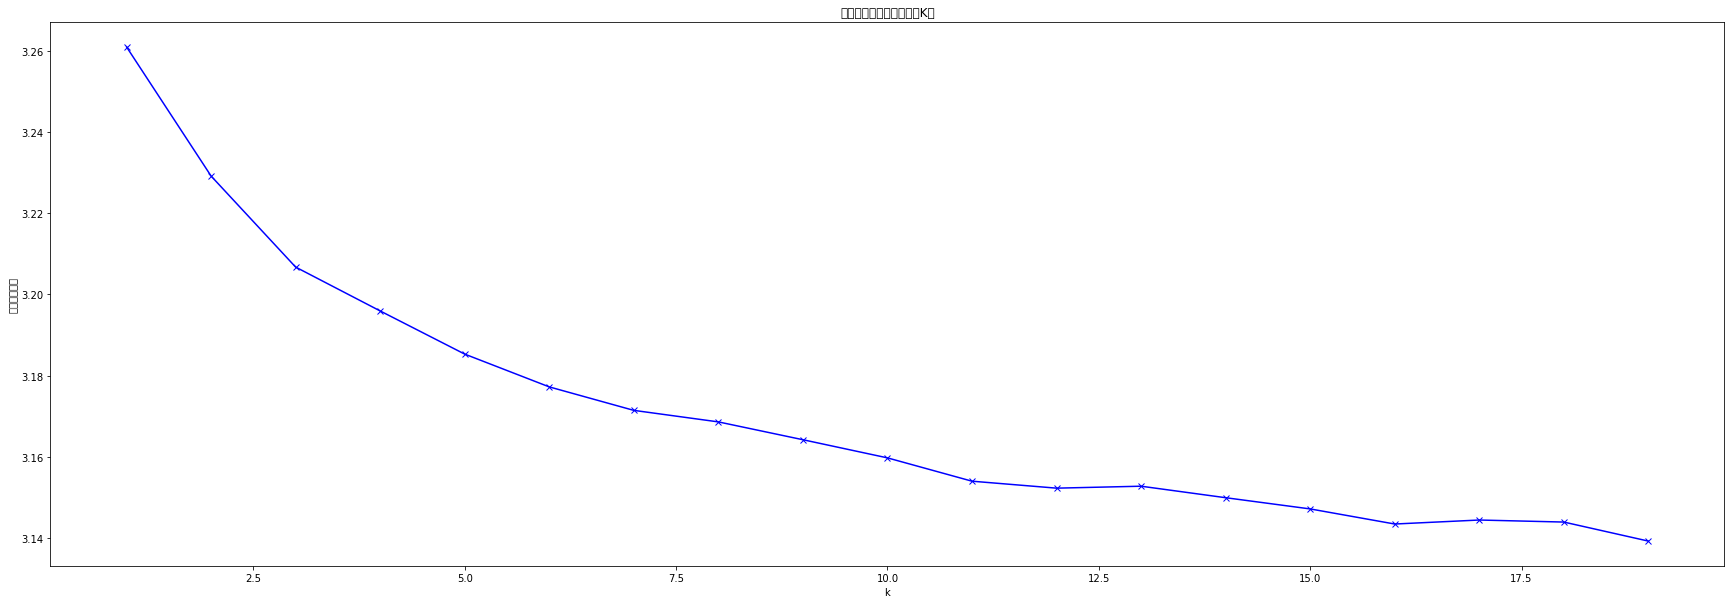

In [24]:
X = pd_jiangwei2.as_matrix()
# 导入聚类分析工具KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
K=range(1,20)
meandistortions=[]
for k in K:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(X)
    meandistortions.append(sum(np.min(cdist(
            X,kmeans.cluster_centers_,"euclidean"),axis=1))/X.shape[0])
plt.plot(K,meandistortions,'bx-')
plt.xlabel('k')
plt.ylabel(u'平均畸变程度')
plt.title(u'用肘部法则来确定最佳的K值')
plt.show()

In [25]:
from sklearn.cluster import KMeans
kms = KMeans(n_clusters=15)# 传入要分类的数目
y = kms.fit_predict(X)
pd_fenqun=pd.DataFrame(y)
pd_fenqun['门店编码']=pd.DataFrame(pd_erwei.index)
print(pd_fenqun)
pd_fenqun.to_csv('excel_to_python6.csv')
# from sklearn.cluster import KMeans
# # 传入要分类的数目
# kms = KMeans(n_clusters=15)
# y = kms.fit_predict(x)
# pd_fenqun=pd.DataFrame(y)
# pd_fenqun['门店编码']=pd.DataFrame(pd_erwei.index)
# print(pd_fenqun)
# pd_fenqun.to_csv('excel_to_python6.csv')

       0        门店编码
0     10  11BJBS0071
1      0  11BJBS0151
2      5  11BJBS0181
3      0  11BJBS0241
4      9  11BJBS0271
5      0  11BJBS0301
6      9  11BJBS0321
7      0  11BJBS0351
8      9  11BJBS0361
9     10  11BJBS0391
10     5  11BJBS0401
11     5  11BJBS0411
12    10  11BJBSM003
13     9  11BJBSM005
14     0  11BJBSM006
15     9  11BJBSM007
16     5  11BJBSM008
17     1  11BJBSM009
18     9  11BJBSM012
19     9  11BJBSM013
20     9  11BJBSM014
21     1  11BJBSM015
22     0  11BJBSM016
23     5  11BJBSM017
24     5  11CP1R0131
25    14  11CP1R0161
26    13  11CP1R0191
27     5  11CP1S0211
28     0  11CP1S0231
29     1  11CP1ST002
...   ..         ...
3382   1  1ZWZASZT01
3383   6  1ZXJ1S0011
3384   3  1ZXS1S0011
3385   3  1ZXS1S0041
3386   3  1ZXS1S0051
3387   3  1ZXS1S0071
3388   3  1ZXS1S0091
3389   6  1ZXS1S0161
3390  14  1ZXS1S0171
3391  10  1ZXS1S0181
3392   1  1ZXS1S0221
3393   5  1ZXS1S0231
3394   3  1ZXS1SM001
3395   6  1ZXT1S0011
3396   6  1ZYA1S0011
3397   5  1ZY

In [26]:
X = pd_jiangwei2.as_matrix()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
